# Example case of fitting a spherical cluster. #

## Authors: Charles Romero and Emily Moravec

Last updated: 2024-12-30.

## Usage
This thread shows how to use _M2_ProposalTools_ to fit a spherical cluster model to an input fits file. This notebook is based on the "Example case of fitting a spherical cluster" example on M2_ProposalTools (https://m2-tj.readthedocs.io/en/latest/FitPressureProfile_LW.html which can be downloaded at https://github.com/CharlesERomero/M2_TJ/blob/master/docs/source/FitPressureProfile_LW.ipynb). 

In [1]:
### Useful libraries
import numpy as np
import astropy.units as u
from astropy.io import fits 
#### Modules within our library
import M2_ProposalTools.WorkHorse as WH
import M2_ProposalTools.MakeRMSmap as MRM
import M2_ProposalTools.ModelFitting as MF

In the simulate observation notebook, we created a fits file that had an unsmoothed output (that is, a beam-convolved and filtered image, but not further smoothing) and a corresponding sensitivity map. This notebook takes that fits file as its input.

In [4]:
outdir   = "/USER_SPECIFIED DIRECTORY/"
InputStr = "1z0_3m0_3s5_3s5_10h0_12h0_4p0"
filename = "SimulatedObs_Unsmoothed_"+InputStr+".fits"

We also need to know the redshift and would like to have an initial guess of the mass. I'll start with the known mass because an output figure will display the A10 pressure profile for that mass (and we select the option Dist=True to reflect that our simulated cluster assumed the A10 disturbed pressure profile).

In [5]:
M5_14    = 3.0                     # We leave this separate as we'll want to reference this below
M500     = M5_14*1e14*u.M_sun      # Make M500 a quantity in solar masses
z        = 1.0                     # The redshift

We'll actually feed in the HDUList to a routine. Finally, let's add a few other inputs for the fitting.

Making SNR map
kpc per arcsecond:  8.007974051019099
Integrated SNR taken to be:  11.824641992480108
Adopting a center of  66.0 66.0
[2.42406841e-05 4.22396872e-04] 6 11.824641992480108 5.0
Bins start with:  [ 5.          8.85533854 15.68340412 27.77637057 49.19383294 87.12560892]
Bins are now:  [ 5.         15.         23.2865366  36.15085246 56.12187661 87.12560892]


/Users/emoravec/opt/anaconda3/envs/m2_proposal_tools/lib/python3.12/site-packages/M2_ProposalTools/ModelFitting.py:839: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(circ_Gauss, xdata, ydata,p0=p0)
You must install the tqdm library to use progress indicators with emcee


###########################################################################
R500 found to be:  0.00042752531958217593  radians
M500 found to be:  3.1106037839701157  \pm  0.6287722585879161  1e14 M_sun
P500 found to be:  0.007675091393444909 keV / cm3
Systematic error on M500:  0.03108870311876878  1e14 M_sun
###########################################################################
[[ 4.30813770e-07  9.24726369e-07  9.49019227e-07]
 [ 3.17865075e-01  1.99617639e-01  1.51854658e-01]
 [ 2.14547831e-01  8.43123600e-02  6.40868731e-02]
 [ 1.43393392e-01  4.75298882e-02  4.31517971e-02]
 [ 7.64400051e-02  2.02826719e-02  1.96199445e-02]
 [ 4.01616033e-02  1.18986126e-02  1.24701112e-02]
 [ 9.40349204e-03  6.72591502e-03  5.71385475e-03]
 [-1.39126420e+00  2.47395068e+00  2.79676311e+00]
 [-1.17684231e+00  2.57334063e+00  3.11379270e+00]]


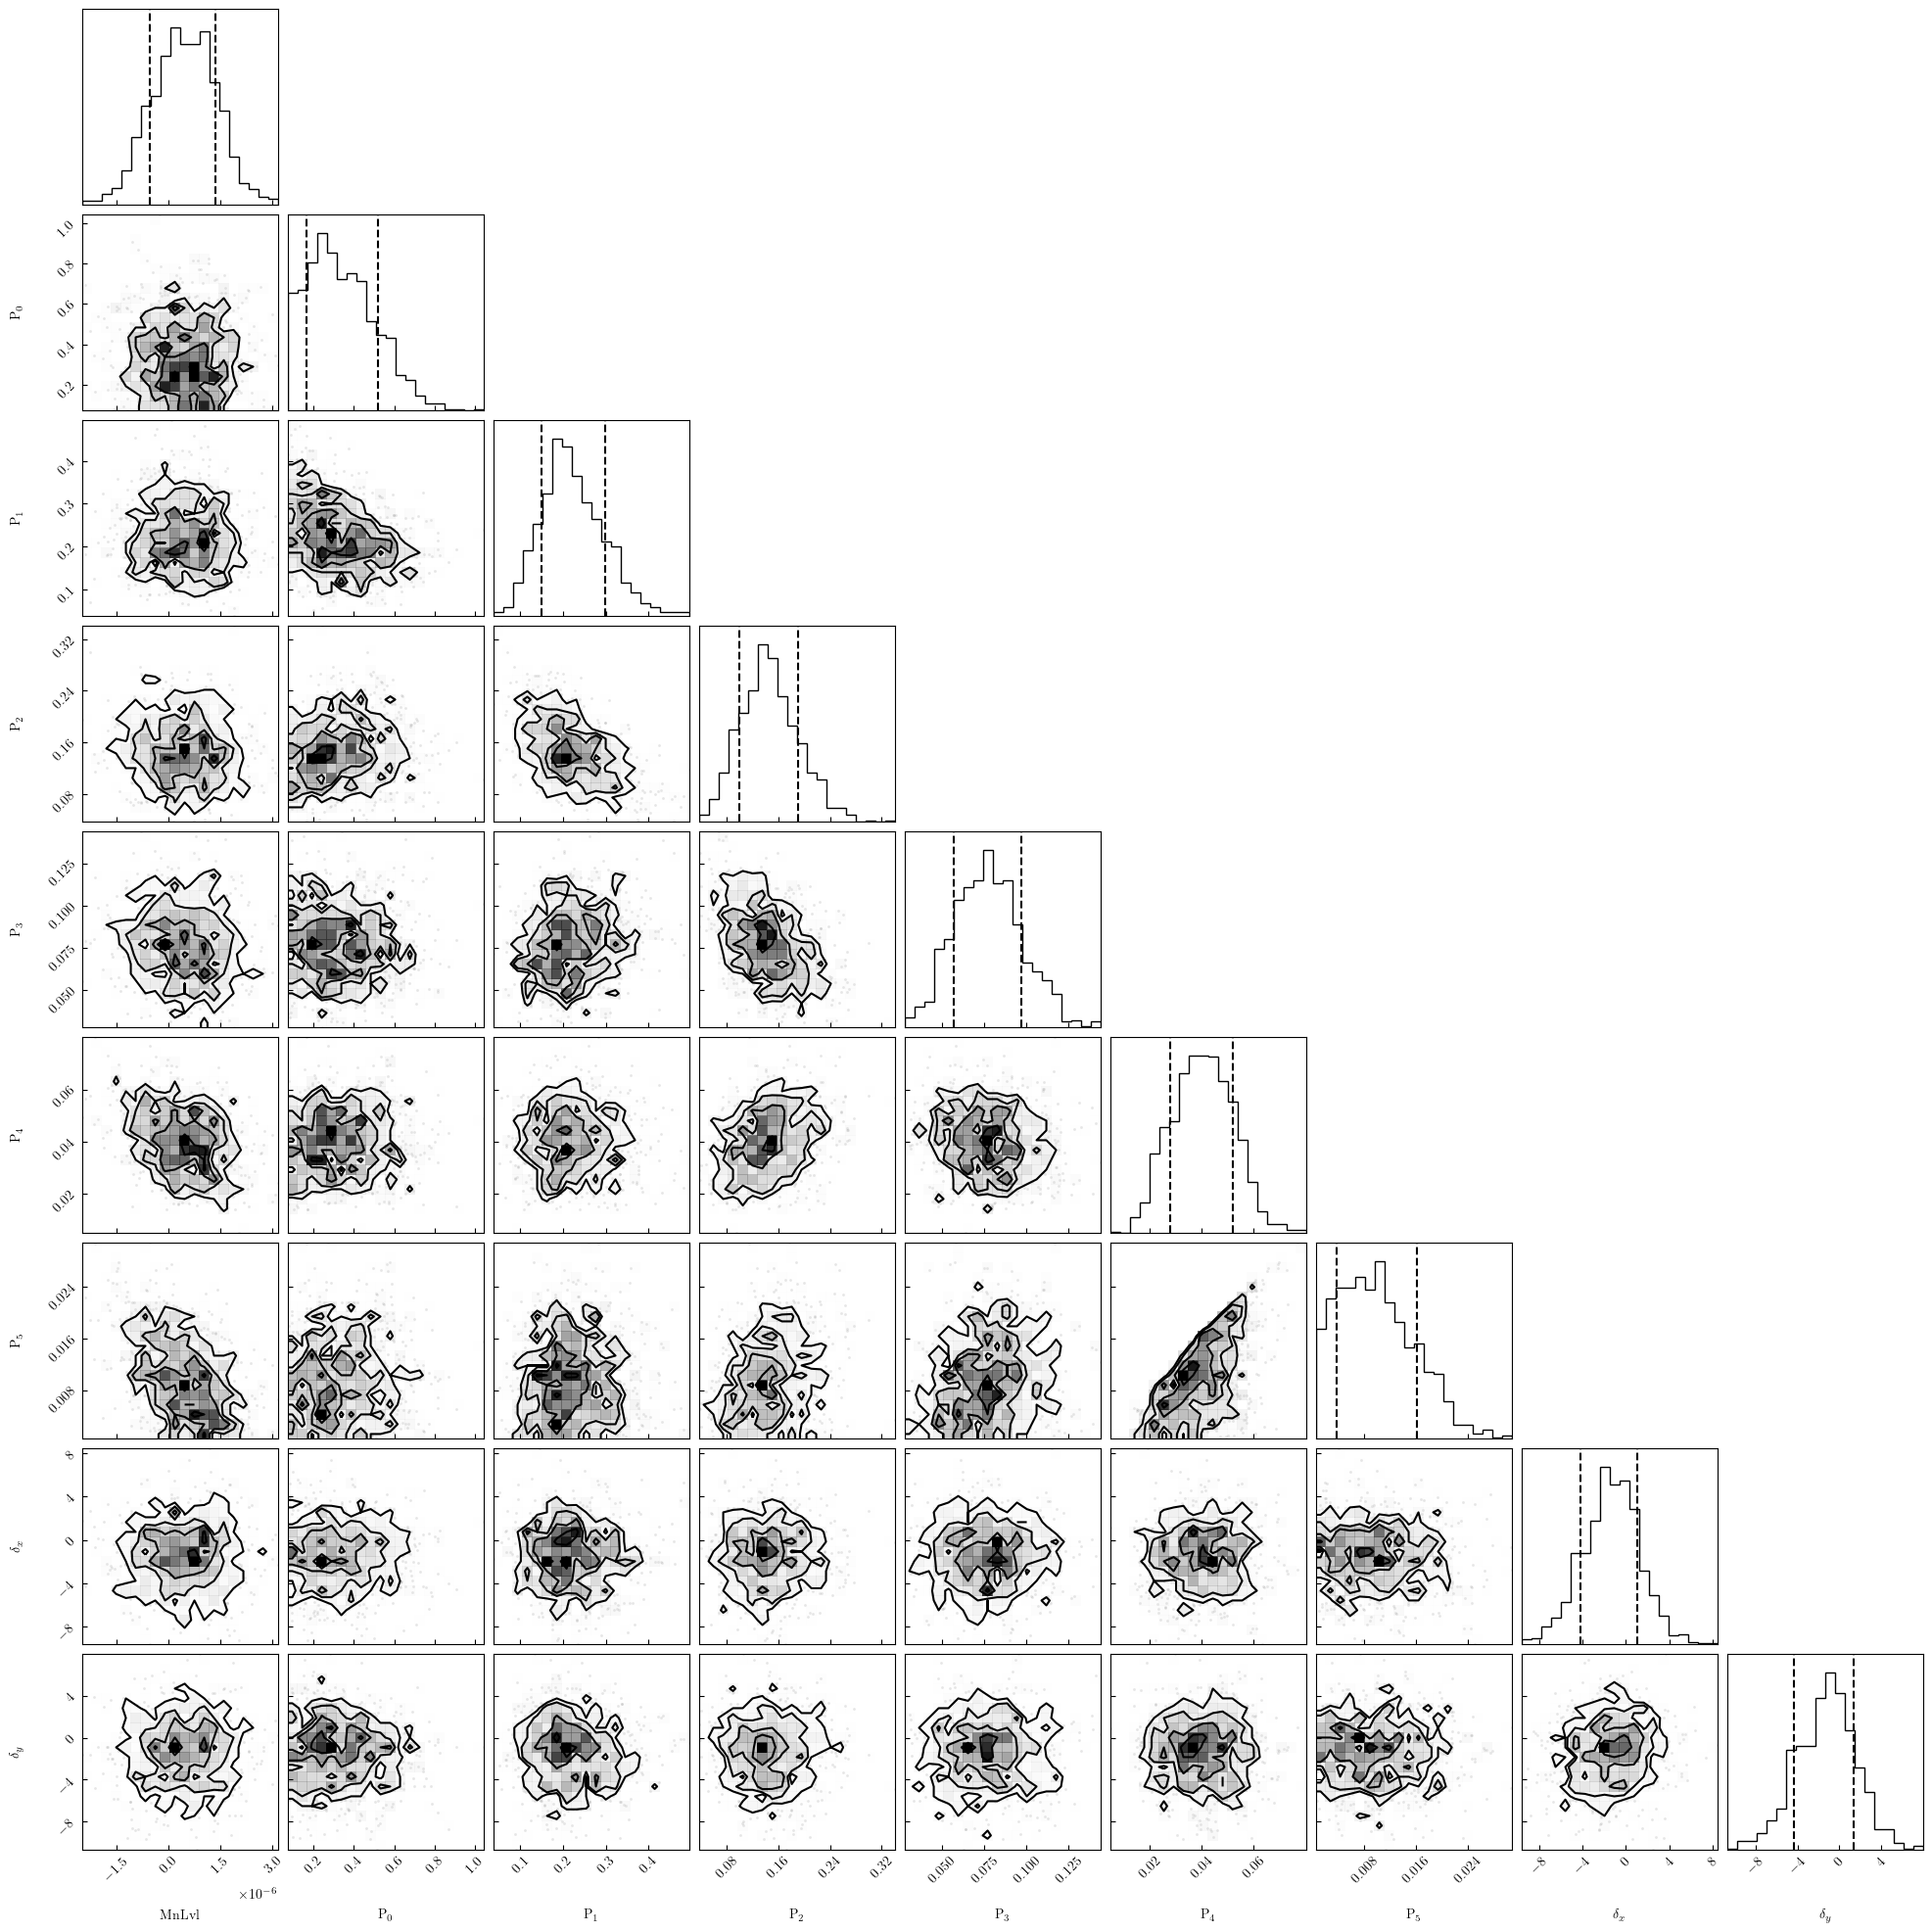

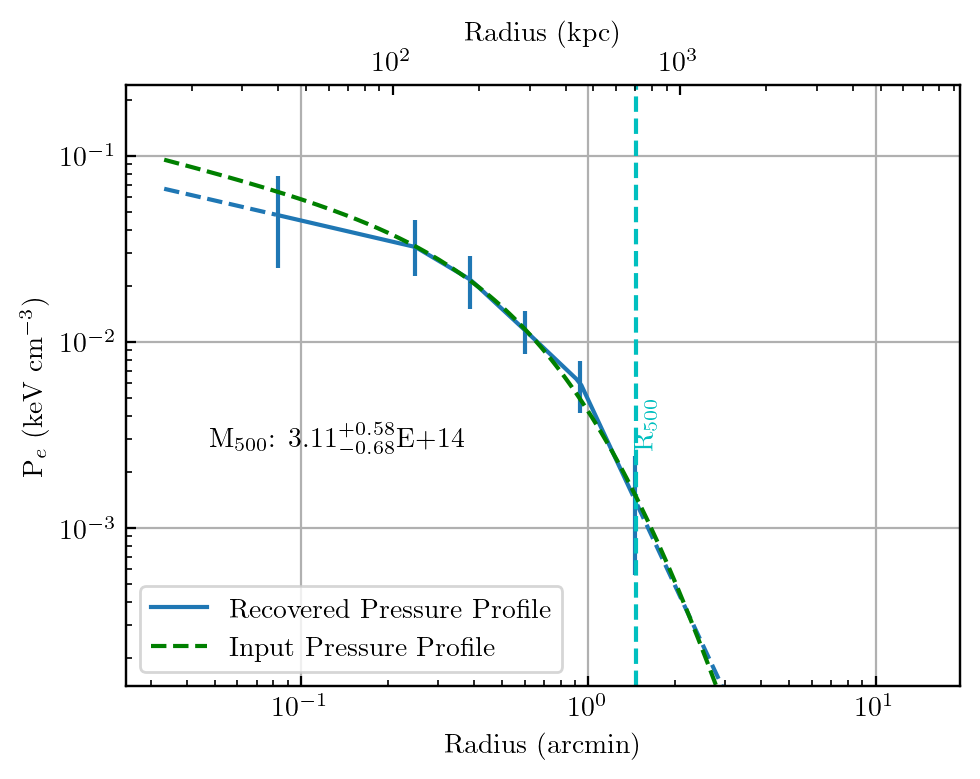

In [6]:
inputHDU = fits.open(outdir+filename)
nsteps   = 1000
nsstr    = "_"+repr(nsteps)+"steps"
outbase = "NP_fit_"+InputStr+nsstr+"_corner.png"
MF.fit_spherical_model(z,M500,inputHDU,outdir=outdir,nsteps=nsteps,outbase=outbase,Dist=True)   # 100 for testing purposes

The recovered profile decent; a slight over-estimation, but perfectly consistent with the input.

I would encourage proposers to use this only as a rough guide and understand that many factors can work against acheiving such clean results.